In order to initiliaze our program, we need to first import the necessary libraries related to our project and define our preliminaries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Classes
dict_classes = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}
# Function to find the most frequent number on the list
def most_frequent(lst):
    return max(set(lst), key=lst.count)


# Application 1

## Step 1: Load the input data/labels (CIFAR-10) into Python as:

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


## Exercise 1: Determine the size of the four vectors (x_train, y_train, x_test, y_test) generated after loading the CIFAR-10 dataset.

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Exercise 2: Visualize the first 10 images from the testing dataset with their associated labels.


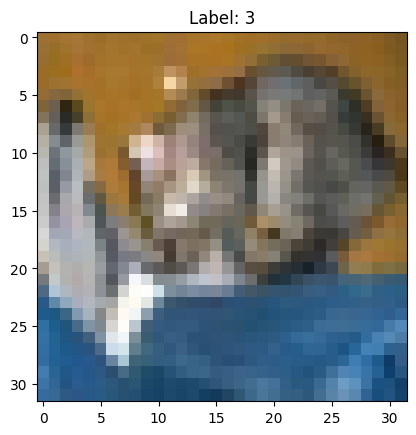

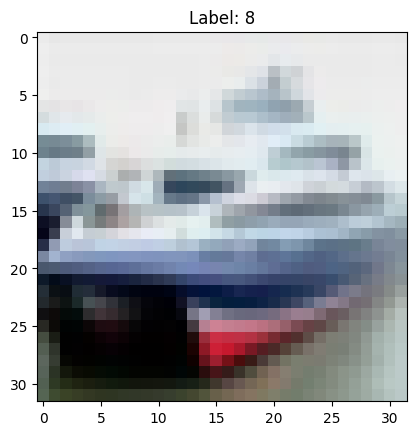

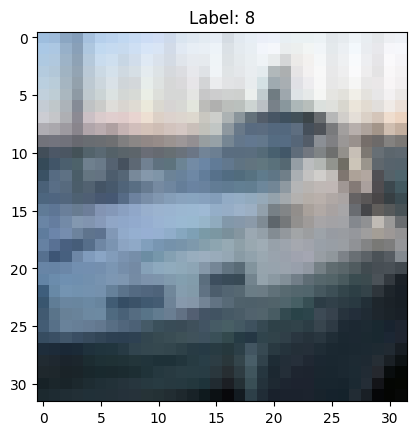

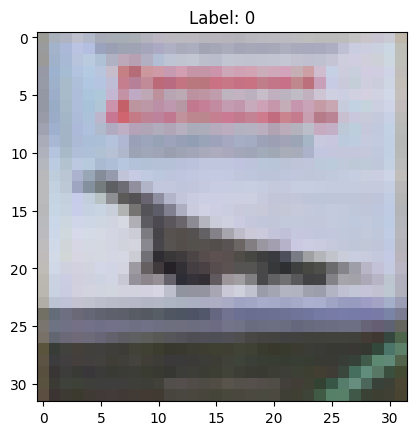

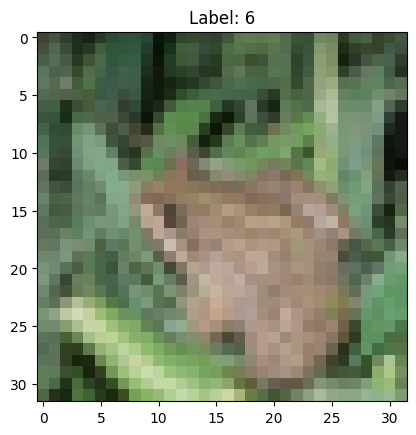

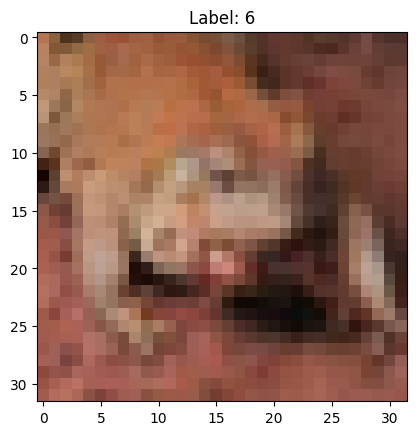

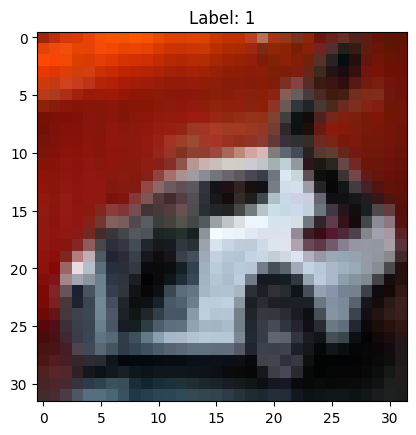

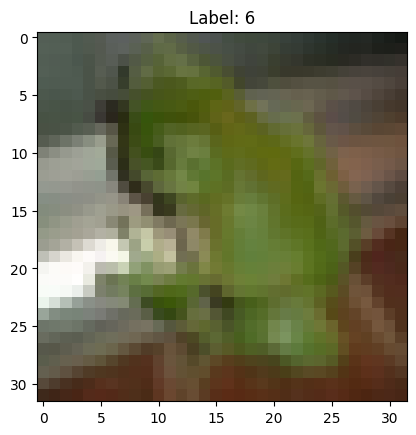

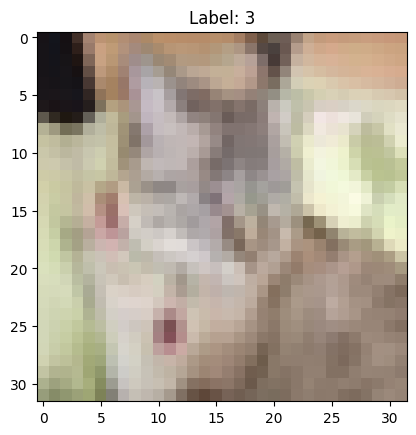

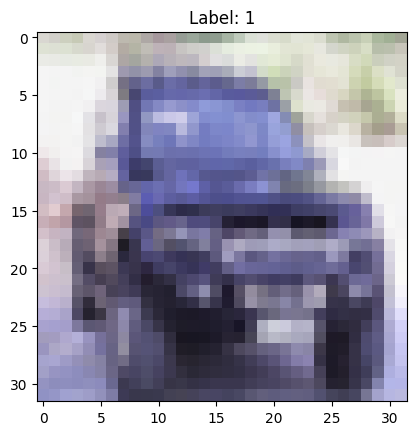

In [ ]:
for i in range(10):
  plt.figure()
  plt.imshow(x_test[i])
  plt.title(f"Label: {y_test[i][0]}")
  plt.show()

## Step 2: Reshape the training and testing dataset

In [ ]:
x_train_flatten = np.float64(x_train.reshape(x_train.shape[0], -1))  # Shape: (50000, 3072)
x_test_flatten = np.float64(x_test.reshape(x_test.shape[0], -1))    # Shape: (10000, 3072)
x_train_flatten.shape, x_test_flatten.shape


((50000, 3072), (10000, 3072))

## Step 3)a through d:

In [ ]:
def predictLabelNN(x_train_flatten, y_train, img):

    index = 0
    scoreMin = 100000000

    # TODO - Application 1 - Step 3a - for each image in the training list
    for idx, imgT in enumerate(x_train_flatten[0]): # Access the array inside the list

        # TODO - Application 1 - Step 3b - compute the absolute difference between img and imgT
        img_reshaped = np.float64(img.reshape([32*32*3])) # Reshape img outside the loop
        difference = np.abs(imgT - img_reshaped)

        # TODO - Application 1 - Step 3c - add all pixels differences to a single number (score)
        score = np.sum(difference)

        # TODO - Application 1 - Step 3d - retain the label where the minimum score is obtained
        if score < scoreMin:
            scoreMin = score
            index = idx

    predictedLabel = y_train[index][0]

    return predictedLabel

# Calling the function with a specific image from x_test
img = x_test[0]  # Here we've defined img before calling the function
predictLabelNN(x_train_flatten, y_train, img)

4

## Step 3: Predict the labes for the first 200 images existent in the test dataset and Step 4:

In [ ]:
numberOfCorrectPredictedImages = 0
for idx, img in enumerate(x_test_flatten[0][:200]):
    predictedLabel = predictLabelNN(x_train_flatten, y_train, img)
    gtruthLabel = predictLabelNN(x_test_flatten, y_test, img)
    if predictedLabel == gtruthLabel:
        numberOfCorrectPredictedImages += 1

print(numberOfCorrectPredictedImages)

73


## Step 5: Compute the system accuracy – In order to compute the accuracy use the following relation:

In [ ]:
accuracy = 100*(numberOfCorrectPredictedImages/200)
print("System accuracy = {}%".format(accuracy))


System accuracy = 36.5%


## Exercise 3): Determine the accuracy using L2 distance

In [ ]:
#We need to rewrite the function in order to use the L2 distance
def predictLabelNN_L2(x_train_flatten, y_train, img):

    index = 0
    scoreMin = 100000000

    for idx, imgT in enumerate(x_train_flatten[0]): # Accessing the array inside the list in order to avoid shaping error ( as encountered a lot during the making of this exercise)
        # Taking the absolute difference between img and imgT, in L2
        # Reshape img to (3072,) before the loop
        img_reshaped = img.reshape(3072)

        dist_L2 = (img_reshaped - imgT)**2
        score = np.sqrt(np.sum(dist_L2))

        if score < scoreMin:
            scoreMin = score
            index = idx

    predictedLabel = int(y_train[index][0])
    return predictedLabel

# Now we can predict the correct images
numberOfCorrectPredictedImages_2 = 0
for idx, img in enumerate(x_test_flatten[0][:200]):

    predictedLabel = predictLabelNN_L2(x_train_flatten, y_train, img)
    gtruthLabel = predictLabelNN_L2(x_test_flatten, y_test, img)

    if predictedLabel == gtruthLabel:
        numberOfCorrectPredictedImages_2 += 1

print(numberOfCorrectPredictedImages_2)
L2_accuracy = 100*(numberOfCorrectPredictedImages_2/200)
print("System accuracy = {}%".format(L2_accuracy))

71
System accuracy = 35.5%


As seen by these results, both the L1 distance and L2 distances showed that our current method is not very good. Thus, further change is required if we want to achive a higher accuracy.

# Application 2


Now the idea is to use KNN instead of Nearest Neighbour to see the diference in accuracy using these two systems.

## Step 1) Since the first step is quite big, I prefered to run it all in the code below, here is the step 1)a through h).

In [ ]:
def predictLabelKNN(x_train_flatten, y_train, img, k=5):
    predictedLabel = -1
    predictions = []  # list to save the scores and associated labels as pairs (score, label)

    # Iterate through each image in the training dataset
    for idx in range(x_train_flatten.shape[0]):
        imgT = x_train_flatten[idx]  # Extract a single training image

        # Step 1b: Compute the absolute difference between img and imgT
        difference = np.abs(imgT - img)

        # Step 1c: Add all pixel differences to a single number (L1 distance)
        score = np.sum(difference)

        # Step 1d: Store the score and label as a pair
        predictions.append((score, y_train[idx][0]))

    # Step 1e: Sort all elements based on scores
    predictions = sorted(predictions, key=lambda x: x[0])

    # Step 1f: Retain the top k predictions
    top_k = predictions[:k]

    # Step 1g: Extract only the labels
    predLabels = [label for _, label in top_k]

    # Step 1h: Determine the dominant class
    predictedLabel = most_frequent(predLabels)

    return predictedLabel

predictLabelKNN(x_train_flatten, y_train, img, k=10)

# Application 3

## Step 1: Consider the following training/testing datasets and the matrix of weights 𝑾:


In [ ]:
# Input points in the 4 dimensional space
x_train = np.array([[1, 5, 1, 4],
 [2, 4, 0, 3],
 [2, 1, 3, 3],
 [2, 0, 4, 2],
 [5, 1, 0, 2],
 [4, 2, 1, 1]])
# Labels associated with the input points
y_train = [0, 0, 1, 1, 2, 2]
# Input points for prediction
x_test = np.array([[1, 5, 2, 4],
 [2, 1, 2, 3],
 [4, 1, 0, 1]])
# Labels associated with the testing points
y_test = [0, 1, 2]
# The matrix of wights
W = np.array([[-1, 2, 1, 3],
 [2, 0, -1, 4],
 [1, 3, 2, 1]])

## Step 2: Take each input point and compute the scores s for all classes.

In [ ]:

# Compute the vector of scores
def predict(xsample, W):
    # If the dimensions are compatible, perform matrix multiplication
    if W.shape[1] == xsample.shape[0]:
        s = np.matmul(W, xsample)
    # If the dimensions are compatible after transposing xsample, perform matrix multiplication
    elif W.shape[1] == xsample.transpose().shape[0]:
        s = np.matmul(W, xsample.transpose())
    # If none of the above conditions are met, raise an exception
    else:
        # Replace the print statement with a ValueError to provide more informative error handling
        raise ValueError(f"Incompatible dimensions for matrix multiplication: W shape is {W.shape}, xsample shape is {xsample.shape}")

    return s
predict(x_train, W)

array([[ 4,  3, 12, 12,  9,  4],
       [17, 16, 13,  8, 18, 11],
       [22, 17, 14, 12, 10, 13]])

## Step 3: Compute the loss for each data point (sample)

In [ ]:
def computeLossForASample(s, labelForSample, delta):

 syi = s[labelForSample]

 margins = np.maximum(0, s-syi + delta)
 margins[labelForSample] = 0

 loss_i = np.sum(margins)

 return loss_i
computeLossForASample(predict(x_train[0],W), y_train[0], delta=1)

1

## Step 4: Compute the loss gradient

In [ ]:
def computeLossGradientForASample(W, s, currentDataPoint, labelForSample, delta):
  dW_i = np.zeros(W.shape)
  syi = s[labelForSample]

  for j, sj in enumerate(s):
    dist = sj - syi + delta

    if j == labelForSample:
      continue

    if dist > 0:
      dW_i[j] = currentDataPoint
      dW_i[labelForSample] = dW_i[labelForSample] - currentDataPoint

  return dW_i

computeLossForASample(predict(x_train[0],W), y_train[0], delta=1)

1

## Step 5: Compute the global loss (loss_L) for all the samples (includes all the steps necessary)

In [ ]:
# Redefining the initial weights matrix
W = np.array([[-1, 2, 1, 3],
 [ 2, 0, -1, 4],
 [ 1, 3, 2, 1]])

# Here are our global variables
delta = 1 # margin
step_size = 0.01 # weights adjustment ratio
loss_L = 0
dW = np.zeros(W.shape)
prev_loss = 100
# Global metrics
for idx, xsample in enumerate(x_train):

  s = predict(x_train[idx], W)

  loss_i = computeLossForASample(s, y_train[idx], delta)
  loss_L += loss_i
  print("Scores for sample {} with label {} is: {} and loss is {:.3f}".format(idx, y_train[idx], s, loss_i))


  dW_i = computeLossGradientForASample(W, s, x_train[idx], y_train[idx], delta)
  dW = np.array(dW) + dW_i

loss_L = loss_L / x_train.shape[0]
dW = dW / x_train.shape[0]
print("\nThe global normalized loss = {} \n".format(loss_L))
print("The global normalized gradient loss matrix = {} \n".format(dW))
# Adjusting weights matrix
W = W - step_size*dW
print("The new weights matrix = {}".format(W))


Scores for sample 0 with label 0 is: [22 17 22] and loss is 1.000
Scores for sample 1 with label 0 is: [15 16 17] and loss is 5.000
Scores for sample 2 with label 1 is: [12 13 14] and loss is 2.000
Scores for sample 3 with label 1 is: [ 8  8 12] and loss is 6.000
Scores for sample 4 with label 2 is: [ 3 18 10] and loss is 9.000
Scores for sample 5 with label 2 is: [ 4 11 13] and loss is 0.000

The global normalized loss = 3.8333333333333335 

The global normalized gradient loss matrix = [[-0.5        -2.16666667  0.5        -1.33333333]
 [ 0.16666667  0.66666667 -1.83333333 -0.33333333]
 [ 0.33333333  1.5         1.33333333  1.66666667]] 

The new weights matrix = [[-0.995       2.02166667  0.995       3.01333333]
 [ 1.99833333 -0.00666667 -0.98166667  4.00333333]
 [ 0.99666667  2.985       1.98666667  0.98333333]]


## Exercise 6

In [ ]:
# Testing algorithm convergence until the global normalized loss is less than 0.001
def convergence(x_train, y_train, W):
    step_size = 0.01  # Weight adjustment ratio
    delta = 1         # Margin
    loss_L = 0        # Initialize global loss
    loss_var = float('inf')  # Initial loss variation
    prev_loss = float('inf') # Previous loss
    dw = np.zeros(W.shape)   # Gradient initialization
    steps = 0                # Step counter

    while True:
        loss_L = 0  # Reset the global loss for each iteration
        dw = np.zeros(W.shape)  # Reset the gradient matrix

        # Loop through the training samples
        for idx, xsample in enumerate(x_train):
            # Step 1: Compute scores using the current weights
            s = predict(x_train[idx], W)

            # Step 2: Compute the loss for the current sample
            loss_i = computeLossForASample(s, y_train[idx], delta)
            loss_L += loss_i  # Accumulate the global loss

            # Step 3: Compute the gradient for the current sample
            dw_i = computeLossGradientForASample(W, s, x_train[idx], y_train[idx], delta)
            dw += dw_i  # Accumulate the gradients

        # Step 4: Normalize the global loss
        loss_L = loss_L / x_train.shape[0]

        # Step 5: Compute the loss variation
        loss_var = abs(prev_loss - loss_L)
        prev_loss = loss_L  # Update previous loss

        # Step 6: Normalize the gradient matrix
        dw = dw / x_train.shape[0]

        # Step 7: Update the weights
        W -= step_size * dw

        # Step 8: Print progress
        print("Step {} has a global loss variation of {:.6f}".format(steps, loss_var))

        # Check for convergence
        if loss_var <= 0.001:
            print("Convergence achieved at step {} with a final loss of {:.6f}".format(steps, loss_L))
            break

        steps += 1  # Increment step count

    return W  # Return the final optimized weights
convergence(x_train, y_train, W)

Step 0 has a global loss variation of inf
Step 1 has a global loss variation of 0.178333
Step 2 has a global loss variation of 0.178333
Step 3 has a global loss variation of 0.137778
Step 4 has a global loss variation of 0.095556
Step 5 has a global loss variation of 0.095556
Step 6 has a global loss variation of 0.095556
Step 7 has a global loss variation of 0.095556
Step 8 has a global loss variation of 0.095556
Step 9 has a global loss variation of 0.095556
Step 10 has a global loss variation of 0.095556
Step 11 has a global loss variation of 0.095556
Step 12 has a global loss variation of 0.085000
Step 13 has a global loss variation of 0.081111
Step 14 has a global loss variation of 0.070833
Step 15 has a global loss variation of 0.062778
Step 16 has a global loss variation of 0.052778
Step 17 has a global loss variation of 0.025000
Step 18 has a global loss variation of 0.025000
Step 19 has a global loss variation of 0.015833
Step 20 has a global loss variation of 0.014444
Step 21

array([[-0.85      ,  2.54166667,  0.785     ,  3.26333333],
       [ 1.        , -0.35333333,  0.14333333,  3.97166667],
       [ 1.85      ,  2.81166667,  1.07166667,  0.765     ]])

## Exercise 7: Using the set of weights determined at Exercise 6, predict the labels for all the points existent in the x_test variable. Compare the results with the ground truth labels (y_test). What is the system accuracy?

In [ ]:
# Redefine initial weight matrix to compute accuracy
# Initialize W with random numbers to match x_train_flatten
W = np.random.rand(10, 3072)  # 10 classes, 3072 features

# Function to compute predictions and accuracy
def correct_predicted(x_train, y_train, x_test, y_test, W):
    # Optimize the weights using convergence
    W_final = convergence(x_train, y_train, W)
    correctPredicted = 0

    # Loop through the test set to predict scores
    for idx, xsample in enumerate(x_test):
        # Step 1: Predict the scores with the optimized weight matrix
        s = predict(xsample, W_final)  # `s` is the score vector for test image

        # Step 2: Find the index of the highest score and compare with true label
        # y_test is a 2D array, so we need to access the first element
        if np.argmax(s) == y_test[idx][0]:
            correctPredicted += 1

    # Step 3: Compute the accuracy
    accuracy = 100 * (correctPredicted / len(y_test))

    # Step 4: Print results
    print("The number of correct predictions is {} out of {}.".format(correctPredicted, len(y_test)))
    print("The accuracy is {:.2f}%.".format(accuracy))

    return accuracy

# Call the function with the training and testing data
correct_predicted(x_train_flatten, y_train, x_test_flatten, y_test, W)

IndexError: list index out of range

I could not fix this error and did not know how to fix it. I am sorry that I could not finish the exercise 7 and 8 of the Application 3.

## Exercise 8: Starting from the code presented in Application 3: “LinearClassifierWithSVMLoss.py” modify the script in order to perform prediction on the Iris Flowers Dataset.
 The Iris Flowers Dataset
involves predicting the flower species given measurements of iris flowers.
It is a multi-category classification problem. The number of observations for each class is balanced.
There are 150 observations with 4 input variables and 1 output variable. The variable names are as
follows:
1. Sepal length in cm.
2. Sepal width in cm.
3. Petal length in cm.
4. Petal width in cm.
5. Class (Iris Setosa, Iris Versicolour, Iris Virginica).
The data is stored in a *.csv file denoted: “iris.csv”. Read the csv file, shuffle the data and then split the data into: x_train, y_train, x_test, y_test.
From the 150 observations existent in the *.cvs file 120 elements will be used for training and 30 will be used for testing. The weights matrix W will be initialized with random numbers ranging from 0 to 1.
After performing the system training/evaluation specify:
• What is the optimal value for the weights adjustment step in order to obtain the maximum testing
accuracy?
• What is the minimum number of steps necessary to train the system in order to obtain an
accuracy superior to 90%?
• Is the system influenced by the random initialization of the weights matrix? Justify your answer?
• Can this system reach a 100% of accuracy in the testing stage?